https://github.com/DistrictDataLabs/yellowbrick

In [1]:
!pip install yellowbrick

     |████████████████████████████████| 263 kB 3.0 MB/s eta 0:00:01


https://www.scikit-yb.org/en/latest/quickstart.html#walkthrough

Let’s consider a regression analysis as a simple example of the use of visualizers in the machine learning workflow. Using a bike sharing dataset based upon the one uploaded to the UCI Machine Learning Repository, we would like to predict the number of bikes rented in a given hour based on features like the season, weather, or if it’s a holiday.

In [2]:
import yellowbrick as yb

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
import pandas as pd
from yellowbrick.datasets import load_bikeshare

X, y = load_bikeshare()
print(X.head())

   season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0       1     0      1     0        0        6           0        1  0.24   
1       1     0      1     1        0        6           0        1  0.22   
2       1     0      1     2        0        6           0        1  0.22   
3       1     0      1     3        0        6           0        1  0.24   
4       1     0      1     4        0        6           0        1  0.24   

   feelslike  humidity  windspeed  
0     0.2879      0.81        0.0  
1     0.2727      0.80        0.0  
2     0.2727      0.80        0.0  
3     0.2879      0.75        0.0  
4     0.2879      0.75        0.0  


The machine learning workflow is the art of creating model selection triples, a combination of features, algorithm, and hyperparameters that uniquely identifies a model fitted on a specific data set. As part of our feature selection, we want to identify features that have a linear relationship with each other, potentially introducing covariance into our model and breaking OLS (guiding us toward removing features or using regularization). We can use the Rank Features visualizer to compute Pearson correlations between all pairs of features as follows:

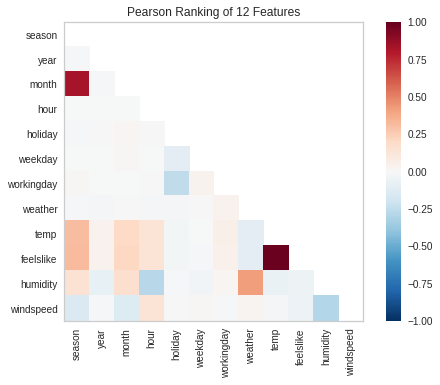

In [6]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

In this chart, we see that the features temp and feelslike have a strong correlation and also that the feature season has a strong correlation with the feature month. This seems to make sense; the apparent temperature we feel outside depends on the actual temperature and other airquality factors, and the season of the year is described by the month! To dive in deeper, we can use the Direct Data Visualization (JointPlotVisualizer) to inspect those relationships.

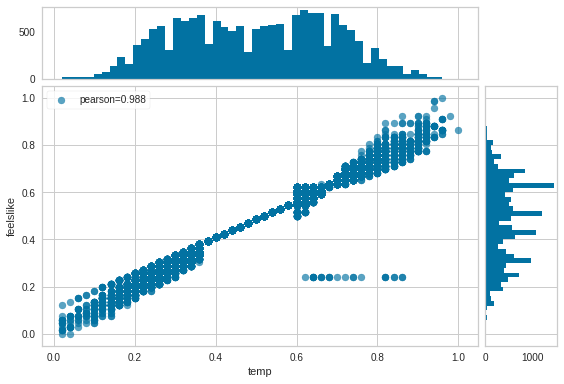

In [7]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['temp', 'feelslike'])
visualizer.fit_transform(X, y)
visualizer.show();

At this point, we can train our model; let’s fit a linear regression to our model and plot the residuals.

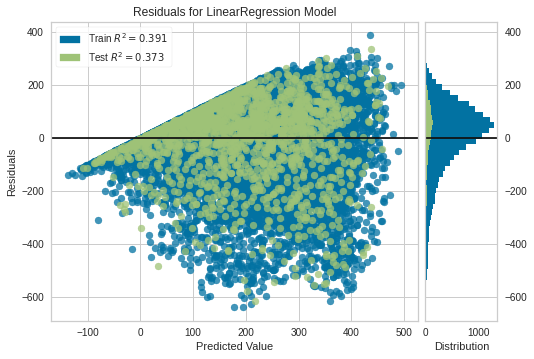

In [8]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()